In [33]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from functions import load_data

In [34]:
data = load_data()
data.head()

,stock_id,date,Advt_12M_Usd,Advt_3M_Usd,Advt_6M_Usd,Asset_Turnover,Bb_Yld,Bv,Capex_Ps_Cf,Capex_Sales,Cash_Div_Cf,Cash_Per_Share,Cf_Sales,Debtequity,Div_Yld,Dps,Ebit_Bv,Ebit_Noa,Ebit_Oa,Ebit_Ta,Ebitda_Margin,Eps,Eps_Basic,Eps_Basic_Gr,Eps_Contin_Oper,Eps_Dil,Ev,Ev_Ebitda,Fa_Ci,Fcf,Fcf_Bv,Fcf_Ce,Fcf_Margin,Fcf_Noa,Fcf_Oa,Fcf_Ta,Fcf_Tbv,Fcf_Toa,Fcf_Yld,Free_Ps_Cf,Int_Rev,Interest_Expense,Mkt_Cap_12M_Usd,Mkt_Cap_3M_Usd,Mkt_Cap_6M_Usd,Mom_11M_Usd,Mom_5M_Usd,Mom_Sharp_11M_Usd,Mom_Sharp_5M_Usd,Nd_Ebitda,Net_Debt,Net_Debt_Cf,Net_Margin,Netdebtyield,Ni,Ni_Avail_Margin,Ni_Oa,Ni_Toa,Noa,Oa,Ocf,Ocf_Bv,Ocf_Ce,Ocf_Margin,Ocf_Noa,Ocf_Oa,Ocf_Ta,Ocf_Tbv,Ocf_Toa,Op_Margin,Op_Prt_Margin,Oper_Ps_Net_Cf,Pb,Pe,Ptx_Mgn,Recurring_Earning_Total_Assets,Return_On_Capital,Rev,Roa,Roc,Roce,Roe,Sales_Ps,Share_Turn_12M,Share_Turn_3M,Share_Turn_6M,Ta,Tev_Less_Mktcap,Tot_Debt_Rev,Total_Capital,Total_Debt,Total_Debt_Capital,Total_Liabilities_Total_Assets,Vol1Y_Usd,Vol3Y_Usd,R1M_Usd,R3M_Usd,R6M_Usd,R12M_Usd
177279,1,2000-01-31,0.41,0.39,0.42,0.19,0.65,0.63,0.50,0.90,0.02,0.50,0.93,0.88,0.01,0.40,0.10,0.08,0.08,0.08,0.70,0.01,0.50,0.5,0.01,0.50,0.65,0.57,0.96,0.61,0.43,0.29,0.66,0.35,0.43,0.44,0.81,0.89,0.62,0.50,0.75,0.87,0.52,0.50,0.52,0.59,0.24,0.56,0.26,0.94,0.84,0.03,0.02,0.01,0.01,0.02,0.03,0.97,0.75,0.69,0.70,0.73,0.21,0.91,0.33,0.45,0.47,0.73,0.82,0.33,0.5,0.50,0.21,0.50,0.02,0.03,0.08,0.45,0.03,0.08,0.43,0.02,0.50,0.31,0.28,0.30,0.68,0.80,0.91,0.74,0.82,0.88,0.74,0.77,0.68,-0.036,0.196,0.255,1.044
83327,2,2000-01-31,0.70,0.74,0.72,0.55,0.36,0.30,0.51,0.84,0.31,0.34,0.79,0.10,0.40,0.14,0.17,0.68,0.71,0.43,0.49,0.41,0.41,0.5,0.50,0.40,0.41,0.97,0.28,0.28,0.28,0.24,0.29,0.30,0.30,0.29,0.89,0.76,0.28,0.34,0.97,0.07,0.49,0.59,0.56,0.85,0.74,0.73,0.71,0.03,0.08,0.30,0.84,0.31,0.32,0.81,0.93,0.79,0.10,0.08,0.26,0.25,0.38,0.67,0.89,0.93,0.68,0.93,0.85,0.64,0.5,0.27,0.85,0.90,0.72,0.41,0.61,0.17,0.91,0.61,0.49,0.68,0.17,0.92,0.89,0.90,0.14,0.09,0.11,0.19,0.10,0.10,0.02,0.91,0.91,0.659,-0.406,-0.593,-0.642
48737,3,2000-01-31,0.15,0.12,0.15,0.02,0.42,0.18,0.05,0.06,0.71,0.76,0.58,0.95,0.67,0.49,0.89,0.80,0.94,0.87,0.87,0.36,0.50,0.5,0.50,0.35,0.28,0.24,0.04,0.47,0.69,0.88,0.91,0.42,0.42,0.42,0.38,0.22,0.88,0.76,0.19,0.50,0.11,0.11,0.11,0.54,0.54,0.54,0.51,0.46,0.62,0.69,0.79,0.93,0.21,0.76,0.15,0.10,0.45,0.50,0.21,0.36,0.94,0.79,0.14,0.15,0.16,0.22,0.09,0.83,0.5,0.39,0.19,0.25,0.82,0.30,0.14,0.10,0.16,0.14,0.10,0.30,0.20,0.34,0.24,0.34,0.50,0.56,0.99,0.42,0.58,0.94,0.88,0.22,0.49,0.077,0.085,0.194,0.406
146239,4,2000-01-31,0.37,0.32,0.35,0.29,0.78,0.52,0.95,0.90,0.83,0.07,0.75,0.71,0.91,0.90,0.35,0.27,0.30,0.31,0.63,0.72,0.70,0.5,0.69,0.72,0.44,0.51,0.90,0.16,0.19,0.17,0.17,0.21,0.20,0.20,0.69,0.98,0.15,0.07,0.81,0.59,0.40,0.39,0.40,0.45,0.34,0.43,0.16,0.78,0.64,0.65,0.54,0.71,0.43,0.51,0.35,0.97,0.57,0.50,0.56,0.59,0.30,0.80,0.44,0.51,0.54,0.82,0.77,0.78,0.5,0.91,0.26,0.58,0.54,0.35,0.37,0.37,0.37,0.37,0.45,0.25,0.66,0.47,0.31,0.36,0.50,0.64,0.78,0.55,0.61,0.69,0.55,0.21,0.09,-0.016,0.127,0.161,0.237
165974,5,2000-01-31,0.80,0.81,0.78,0.58,0.60,0.59,0.17,0.41,0.55,0.45,0.56,0.07,0.50,0.42,0.06,0.05,0.05,0.05,0.12,0.18,0.19,0.5,0.17,0.19,0.44,0.93,0.05,0.62,0.47,0.51,0.63,0.89,0.83,0.68,0.29,0.52,0.46,0.45,0.39,0.10,0.63,0.65,0.63,0.64,0.86,0.59,0.80,0.01,0.03,0.46,0.34,0.45,0.43,0.34,0.64,0.43,0.25,0.29,0.51,0.26,0.41,0.50,0.91,0.83,0.56,0.21,0.54,0.05,0.5,0.17,0.56,0.81,0.37,0.27,0.05,0.48,0.50,0.05,0.35,0.21,0.15,0.93,0.92,0.91,0.43,0.08,0.05,0.46,0.05,0.06,0.14,0.76,0.76,0.447,0.245,-0.290,0.216


A factor or anomaly is identified if the average returns of the first and the last group constructed according to a particular ranking criteria are different significantly according to statistical test.

<Axes: xlabel='year'>

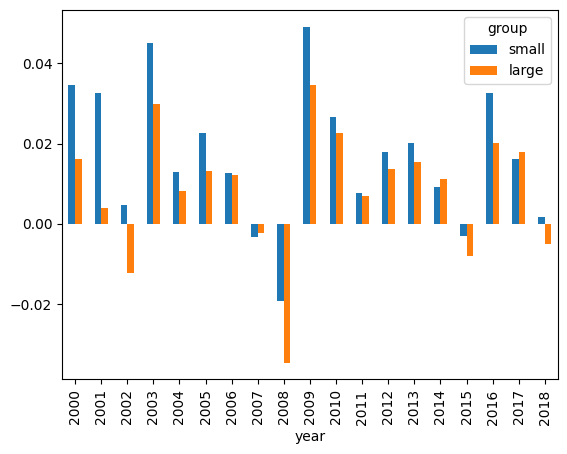

In [35]:
# To show the size effect
df = data[["date","stock_id", "Mkt_Cap_12M_Usd", "R1M_Usd"]]
# at each time pt, we separate equitys into two groups according to their 12-month average market cap
df["mean_cap"] = df["Mkt_Cap_12M_Usd"].groupby(df["date"]).transform(np.mean)
df["group"] = np.where(df["Mkt_Cap_12M_Usd"] > df["mean_cap"], "large","small")
df["year"] = df["date"].dt.year
# we then calculate the 1-month forward return of the equal-weighted portfolio corresponding to these two groups
# finally we average the return of the portfolios over each year.
# this two steps can be merged into one
g = df.groupby(["year", "group"]).R1M_Usd.aggregate("mean").unstack()
g.plot(kind="bar",  y=["small", "large"])

As can be seen small cap stocks give higher return most of the time.